In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# Ajuste de distribuciones
# ==============================================================================
from scipy import stats
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [2]:
df = pd.read_csv("request_X_pais.csv")

In [3]:
df["src_location"].value_counts()


src_location
United States                                5644
Argentina                                    5624
Brazil                                       5433
Singapore                                    5273
United Kingdom                               4856
                                             ... 
Zimbabwe                                        1
Botswana                                        1
Zambia                                          1
Netherlands Antilles                            1
Macedonia The Former Yugoslav Republic Of       1
Name: count, Length: 159, dtype: int64

In [10]:
seed = 1234
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

In [3]:
pais_ar = df[df.src_location == "Argentina"]
pais_us = df[df.src_location == "United States"]
pais_br = df[df.src_location == "Brazil"]
pais_uk = df[df.src_location == "United Kingdom"]

In [12]:
pais.conteo


0        23
7        18
17       22
24        9
34       13
         ..
60566    48
60574    46
60583    41
60593    33
60604    12
Name: conteo, Length: 5624, dtype: int64

# Histograma

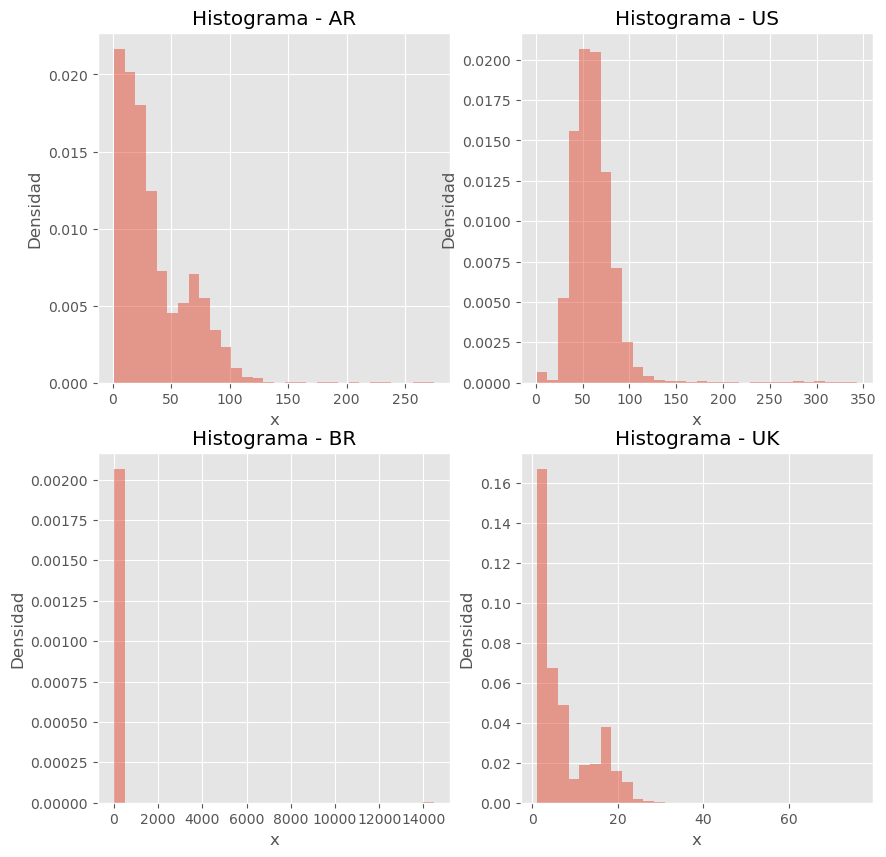

In [35]:
plt.style.use('ggplot')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (10,10))

# Plot1 
ax1.hist(pais_ar['conteo'], bins=30, density=True, alpha=0.5)
ax1.set_title('Histograma - AR')
ax1.set_xlabel('x')
ax1.set_ylabel('Densidad');


# Plot2 

ax2.hist(pais_us['conteo'], bins=30, density=True, alpha=0.5)
ax2.set_title('Histograma - US')
ax2.set_xlabel('x')
ax2.set_ylabel('Densidad');

# Plot3 
#plt.subplot(2,2,3)
ax3.hist(pais_br['conteo'], bins=30, density=True, alpha=0.5)
ax3.set_title('Histograma - BR')
ax3.set_xlabel('x')
ax3.set_ylabel('Densidad');

# Plot4 
# plt.subplot(2,2,4)
ax4.hist(pais_uk['conteo'], bins=30, density=True, alpha=0.5)
ax4.set_title('Histograma - UK')
ax4.set_xlabel('x')
ax4.set_ylabel('Densidad');

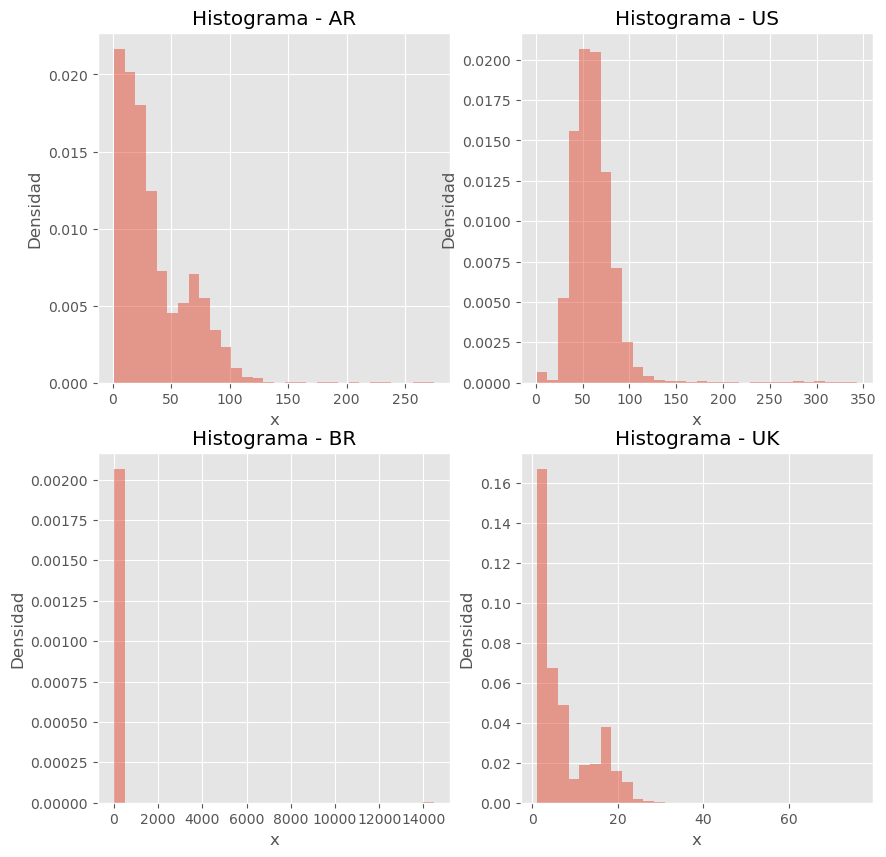

In [11]:
plt.style.use('ggplot')
fig, axs = plt.subplots(ncols=2, nrows=2, figsize = (10,10))

# Plot1 
axs[0,0].hist(pais_ar['conteo'], bins=30, density=True, alpha=0.5)
axs[0,0].set_title('Histograma - AR')
axs[0,0].set_xlabel('x')
axs[0,0].set_ylabel('Densidad');


# Plot2 
axs[0,1].hist(pais_us['conteo'], bins=30, density=True, alpha=0.5)
axs[0,1].set_title('Histograma - US')
axs[0,1].set_xlabel('x')
axs[0,1].set_ylabel('Densidad');

# Plot3 
axs[1,0].hist(pais_br['conteo'], bins=30, density=True, alpha=0.5)
axs[1,0].set_title('Histograma - BR')
axs[1,0].set_xlabel('x')
axs[1,0].set_ylabel('Densidad');

# Plot4 
axs[1,1].hist(pais_uk['conteo'], bins=30, density=True, alpha=0.5)
axs[1,1].set_title('Histograma - UK')
axs[1,1].set_xlabel('x')
axs[1,1].set_ylabel('Densidad');

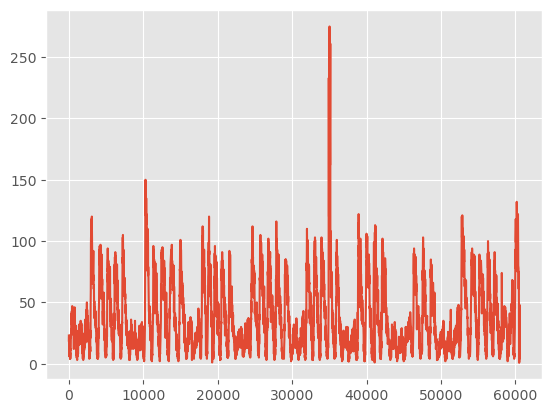

In [12]:
fig,ax = plt.subplots()
ax.plot(pais_ar['conteo'])

In [4]:
# Ajuste del modelo KDE
# ==============================================================================
modelo_kde = KernelDensity(kernel='linear', bandwidth=1)
modelo_kde.fit(X=pais_ar['conteo'].values.reshape(-1,1))

KernelDensity(bandwidth=1, kernel='linear')

In [5]:
# Predicción de densidad
# ==============================================================================
new_X = pais_ar['conteo'].values.reshape(-1,1)
log_density_pred = modelo_kde.score_samples(X=new_X)
#Se aplica el exponente para deshacer el logaritmo
density_pred = np.exp(log_density_pred)
density_pred

array([0.02062589, 0.02187055, 0.01813656, ..., 0.0076458 , 0.01618065,
       0.01991465])

In [6]:
densidad_pred = pd.Series(density_pred)

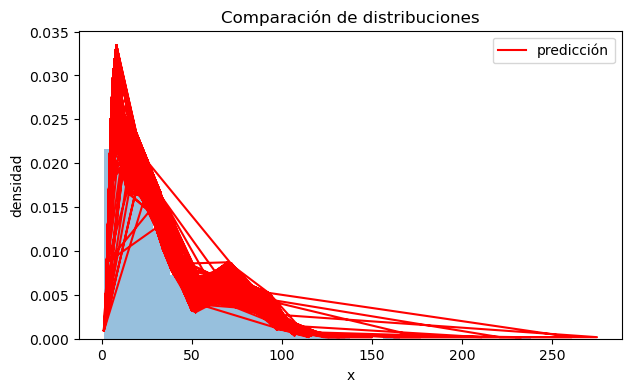

In [10]:
# Gráfico distribución de densidad estimada (predicción) 
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
ax.hist(pais_ar['conteo'], bins=30, density=True, color="#3182bd", alpha=0.5)
ax.plot(new_X, density_pred, color = 'red', label='predicción')
ax.set_title('Comparación de distribuciones')
ax.set_xlabel('x')
ax.set_ylabel('densidad')
ax.legend();

Text(0.5, 1.0, 'Predicción')

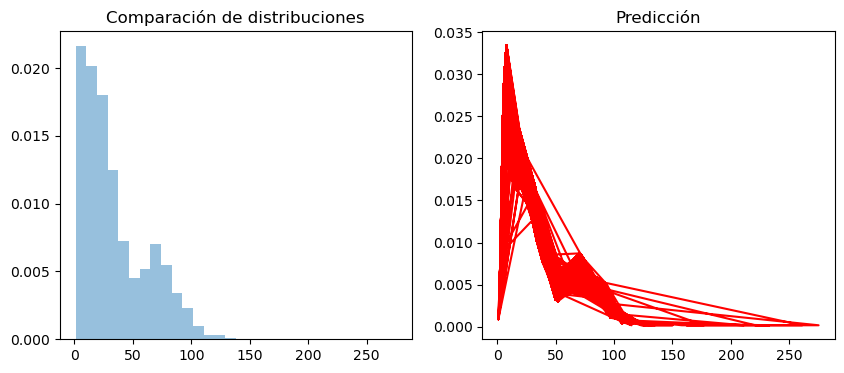

In [13]:
# Gráfico distribución de densidad estimada (predicción) 
# ==============================================================================
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10,4))
axs[0].hist(pais_ar['conteo'], bins=30, density=True, color="#3182bd", alpha=0.5)
axs[1].plot(new_X, density_pred, color = 'red', label='predicción')
axs[0].set_title('Comparación de distribuciones')
axs[1].set_title('Predicción')
# ax.set_xlabel('x')
# ax.set_ylabel('densidad')
# ax.legend();

In [15]:
# Validación cruzada para identificar kernel y bandwidth
# ==============================================================================

parametros = {'kernel': ['gaussian', 'epanechnikov', 'exponential', 'linear'],
              'bandwidth' : np.linspace(0.01, 3, 10)
             }

grid = GridSearchCV(
        estimator  = KernelDensity(),
        param_grid = parametros,
        n_jobs     = -1,
        cv         = 10, 
        verbose    = 0
      )

# Se asigna el resultado a _ para que no se imprima por pantalla
_ = grid.fit(X = pais_ar['conteo'].values.reshape(-1,1))

C:\Users\mbustos_lightech\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [-2.68144238e+07            -inf -6.77681940e+03            -inf
 -2.52900514e+04            -inf -2.41122005e+03            -inf
 -8.38891685e+03            -inf -2.49858125e+03            -inf
 -5.14054453e+03            -inf -2.51520589e+03            -inf
 -3.99116206e+03            -inf -2.51926377e+03            -inf
 -3.45685088e+03            -inf -2.52070347e+03            -inf
 -3.16650046e+03            -inf -2.52171177e+03            -inf
 -2.99196285e+03            -inf -2.52282256e+03            -inf
 -2.87941407e+03            -inf -2.52414849e+03            -inf
 -2.80301991e+03            -inf -2.52568864e+03            -inf]
  warnings.warn(
C:\Users\mbustos_lightech\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1119: RuntimeWarning: invalid value encountered in subtract
  (array - array_means[:, np

In [16]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

modelo_kde_final = grid.best_estimator_

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'bandwidth': 0.34222222222222226, 'kernel': 'exponential'} : -2411.2200531380113 None


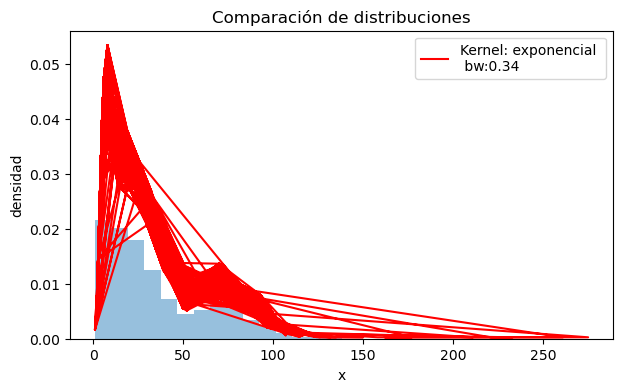

In [17]:
# Gráficos distribución de densidad modelo final
# ==============================================================================
log_densidad_pred = modelo_kde_final.score_samples(pais_ar['conteo'].values.reshape(-1,1))
#Se aplica el exponente para deshacer el logaritmo
densidad_pred = np.exp(log_densidad_pred)

fig, ax = plt.subplots(figsize=(7,4))
ax.hist(pais_ar['conteo'], bins=30, density=True, color="#3182bd", alpha=0.5)
ax.plot(pais_ar['conteo'], densidad_pred, color = 'red', label='Kernel: exponencial \n bw:0.34')
ax.set_title('Comparación de distribuciones')
ax.set_xlabel('x')
ax.set_ylabel('densidad')
ax.legend();

Text(0.5, 1.0, 'Predicción')

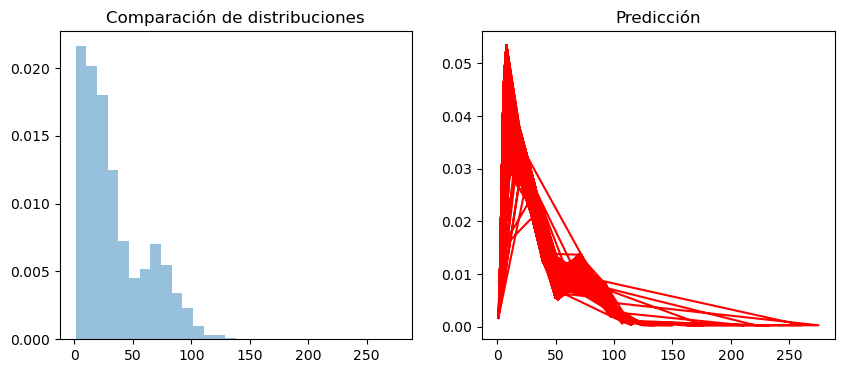

In [18]:
# Gráfico distribución de densidad estimada (predicción) 
# ==============================================================================
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10,4))
axs[0].hist(pais_ar['conteo'], bins=30, density=True, color="#3182bd", alpha=0.5)
axs[1].plot(pais_ar['conteo'], densidad_pred, color = 'red', label='predicción')
axs[0].set_title('Comparación de distribuciones')
axs[1].set_title('Predicción')
# ax.set_xlabel('x')
# ax.set_ylabel('densidad')
# ax.legend();

In [25]:
type(densidad_pred)

numpy.ndarray

In [26]:
len(densidad_pred)

5624

In [27]:
pais_ar.shape

(5624, 5)

In [38]:
pais_ar[pais_ar["probabilidad"]< 0.005].sort_values("conteo")

,_time,src_location,conteo,probabilidad
60528,2025-06-30T20:45:00.000-0300,Argentina,1,0.00162
60498,2025-06-30T18:45:00.000-0300,Argentina,1,0.00162
41098,2025-06-12T08:15:00.000-0300,Argentina,1,0.00162
60521,2025-06-30T20:15:00.000-0300,Argentina,1,0.00162
19254,2025-05-20T23:45:00.000-0300,Argentina,1,0.00162
...,...,...,...,...
35044,2025-06-05T10:30:00.000-0300,Argentina,221,0.00026
34929,2025-06-05T08:15:00.000-0300,Argentina,233,0.00026
35120,2025-06-05T11:45:00.000-0300,Argentina,236,0.00026
35133,2025-06-05T12:00:00.000-0300,Argentina,261,0.00026
